In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df_2006 = pd.read_csv(
    "https://raw.githubusercontent.com/wpinvestigative/arcos-api/"
    "refs/heads/master/data/buyer_monthly2006.csv"
)

df_2007 = pd.read_csv(
    "https://raw.githubusercontent.com/wpinvestigative/arcos-api/"
    "refs/heads/master/data/buyer_monthly2007.csv"
)

df_2008 = pd.read_csv(
    "https://raw.githubusercontent.com/wpinvestigative/arcos-api/"
    "refs/heads/master/data/buyer_monthly2008.csv"
)

df_2009 = pd.read_csv(
    "https://raw.githubusercontent.com/wpinvestigative/arcos-api/"
    "refs/heads/master/data/buyer_monthly2009.csv"
)

df_2010 = pd.read_csv(
    "https://raw.githubusercontent.com/wpinvestigative/arcos-api/"
    "refs/heads/master/data/buyer_monthly2010.csv"
)

df_2011 = pd.read_csv(
    "https://raw.githubusercontent.com/wpinvestigative/arcos-api/"
    "refs/heads/master/data/buyer_monthly2011.csv"
)

df_2012 = pd.read_csv(
    "https://raw.githubusercontent.com/wpinvestigative/arcos-api/"
    "refs/heads/master/data/buyer_monthly2012.csv"
)

df_2013 = pd.read_csv(
    "https://raw.githubusercontent.com/wpinvestigative/arcos-api/"
    "refs/heads/master/data/buyer_monthly2013.csv"
)

df_2014 = pd.read_csv(
    "https://raw.githubusercontent.com/wpinvestigative/arcos-api/"
    "refs/heads/master/data/buyer_monthly2014.csv"
)

df = pd.concat(
    [df_2006, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014],
    axis=0,
    ignore_index=True,
)

In [21]:
df = df[df["BUYER_STATE"].isin(["TX", "FL", "GA", "OR", "WA", "OK"])]

In [22]:
df["county-year"] = df["BUYER_COUNTY"] + "-" + df["year"].astype(str)

In [23]:
df2 = df.groupby(
    by=["BUYER_COUNTY", "BUYER_STATE", "year", "county-year"], as_index=False
)["DOSAGE_UNIT"].sum()

In [24]:
# Regulation went into effect in 2007 TX
data_tx_ok = df2[
    (df2["BUYER_STATE"].isin(["OK", "TX"]))
    & (df2["year"].isin([2006, 2007, 2008, 2009, 2010]))
]
# Regulation went into effect in 2012 WA
data_wa_or = df2[
    (df2["BUYER_STATE"].isin(["WA", "OR"]))
    & (df2["year"].isin([2010, 2011, 2012, 2013, 2014]))
]
# Regulation went into effect in 2010 FL
data_fl_ga = df2[
    (df2["BUYER_STATE"].isin(["FL", "GA"]))
    & (df2["year"].isin([2008, 2009, 2010, 2011, 2012, 2013]))
]

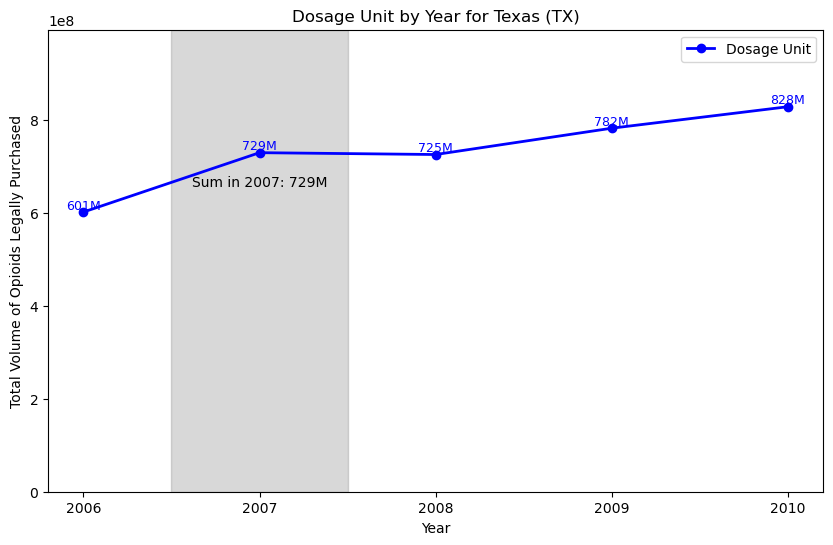

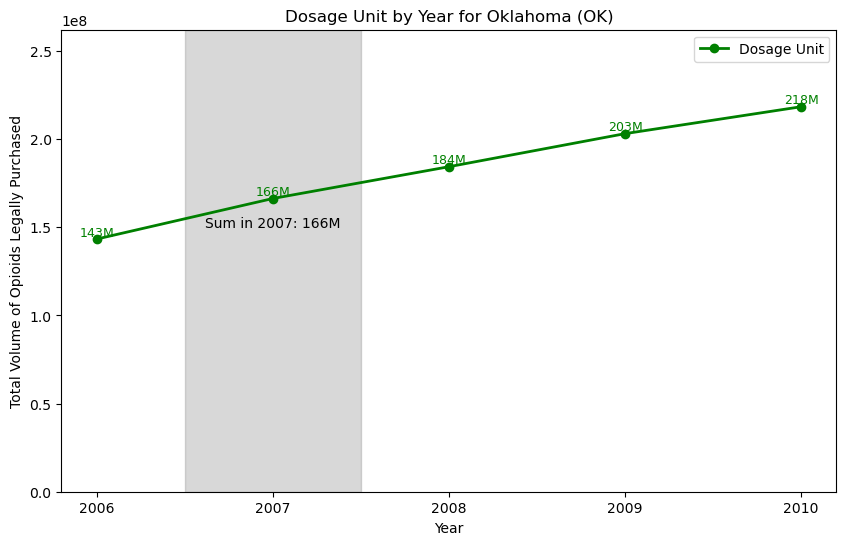

In [25]:
data_tx_yearly = (
    data_tx_ok[data_tx_ok["BUYER_STATE"] == "TX"]
    .groupby("year", as_index=False)["DOSAGE_UNIT"]
    .sum()
)

data_ok_yearly = (
    data_tx_ok[data_tx_ok["BUYER_STATE"] == "OK"]
    .groupby("year", as_index=False)["DOSAGE_UNIT"]
    .sum()
)

sum_dosage_tx_2007 = data_tx_yearly[data_tx_yearly["year"] == 2007][
    "DOSAGE_UNIT"
].values[0]
sum_dosage_ok_2007 = data_ok_yearly[data_ok_yearly["year"] == 2007][
    "DOSAGE_UNIT"
].values[0]

plt.figure(figsize=(10, 6))
plt.plot(
    data_tx_yearly["year"],
    data_tx_yearly["DOSAGE_UNIT"],
    marker="o",
    color="b",
    linewidth=2,
    label="Dosage Unit",
)
plt.title("Dosage Unit by Year for Texas (TX)")
plt.xlabel("Year")
plt.ylabel("Total Volume of Opioids Legally Purchased")

for i, row in data_tx_yearly.iterrows():
    plt.text(
        row["year"],
        row["DOSAGE_UNIT"],
        f"{row['DOSAGE_UNIT'] / 1_000_000:.0f}M",
        ha="center",
        va="bottom",
        fontsize=9,
        color="blue",
    )

plt.axvspan(2007 - 0.5, 2007 + 0.5, color="gray", alpha=0.3)
plt.text(
    2007,
    sum_dosage_tx_2007 * 0.9,
    f"Sum in 2007: {sum_dosage_tx_2007 / 1_000_000:.0f}M",
    ha="center",
    color="black",
    fontsize=10,
)

plt.ylim(0, data_tx_yearly["DOSAGE_UNIT"].max() * 1.2)
plt.xticks(
    range(int(data_tx_yearly["year"].min()), int(data_tx_yearly["year"].max()) + 1)
)

plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(
    data_ok_yearly["year"],
    data_ok_yearly["DOSAGE_UNIT"],
    marker="o",
    color="g",
    linewidth=2,
    label="Dosage Unit",
)
plt.title("Dosage Unit by Year for Oklahoma (OK)")
plt.xlabel("Year")
plt.ylabel("Total Volume of Opioids Legally Purchased")

for i, row in data_ok_yearly.iterrows():
    plt.text(
        row["year"],
        row["DOSAGE_UNIT"],
        f"{row['DOSAGE_UNIT'] / 1_000_000:.0f}M",
        ha="center",
        va="bottom",
        fontsize=9,
        color="green",
    )

plt.axvspan(2007 - 0.5, 2007 + 0.5, color="gray", alpha=0.3)
plt.text(
    2007,
    sum_dosage_ok_2007 * 0.9,
    f"Sum in 2007: {sum_dosage_ok_2007 / 1_000_000:.0f}M",
    ha="center",
    color="black",
    fontsize=10,
)

plt.ylim(0, data_ok_yearly["DOSAGE_UNIT"].max() * 1.2)
plt.xticks(
    range(int(data_ok_yearly["year"].min()), int(data_ok_yearly["year"].max()) + 1)
)

plt.legend()
plt.show()

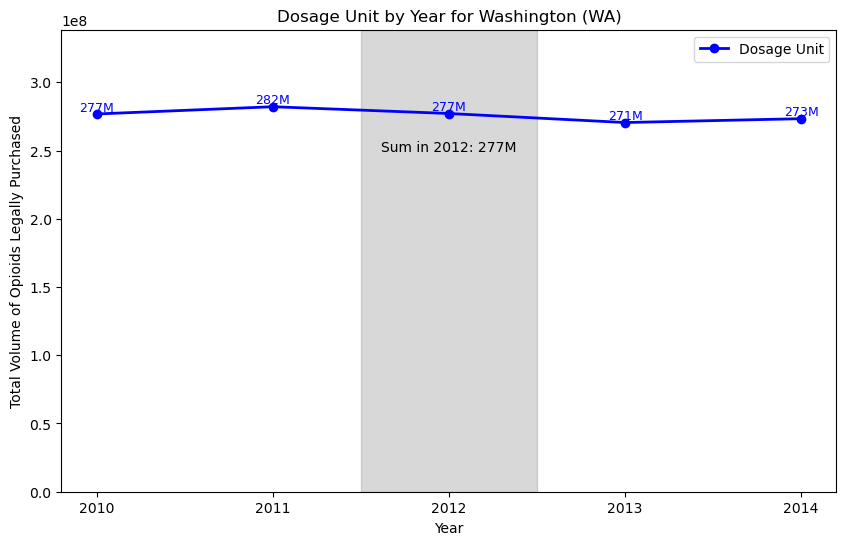

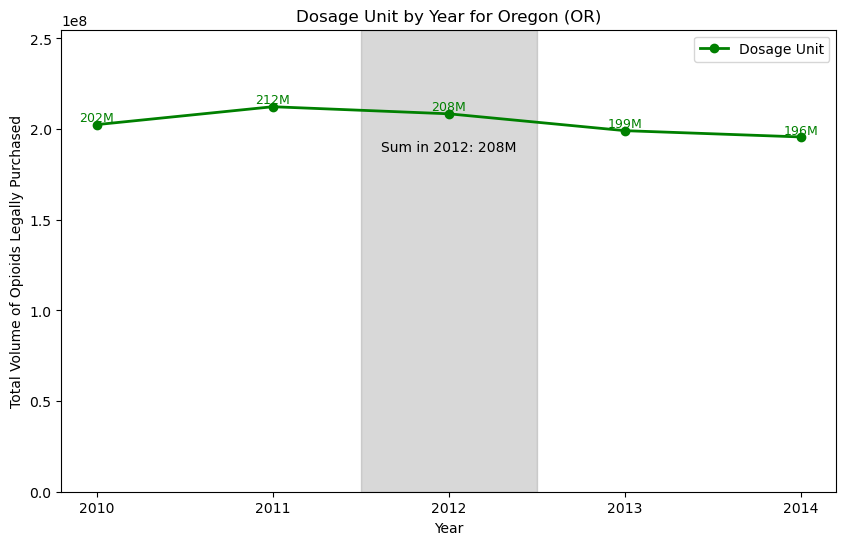

In [26]:
data_wa_yearly = (
    data_wa_or[data_wa_or["BUYER_STATE"] == "WA"]
    .groupby("year", as_index=False)["DOSAGE_UNIT"]
    .sum()
)

data_or_yearly = (
    data_wa_or[data_wa_or["BUYER_STATE"] == "OR"]
    .groupby("year", as_index=False)["DOSAGE_UNIT"]
    .sum()
)

sum_dosage_wa_2012 = data_wa_yearly[data_wa_yearly["year"] == 2012][
    "DOSAGE_UNIT"
].values[0]
sum_dosage_or_2012 = data_or_yearly[data_or_yearly["year"] == 2012][
    "DOSAGE_UNIT"
].values[0]

plt.figure(figsize=(10, 6))
plt.plot(
    data_wa_yearly["year"],
    data_wa_yearly["DOSAGE_UNIT"],
    marker="o",
    color="b",
    linewidth=2,
    label="Dosage Unit",
)
plt.title("Dosage Unit by Year for Washington (WA)")
plt.xlabel("Year")
plt.ylabel("Total Volume of Opioids Legally Purchased")

for i, row in data_wa_yearly.iterrows():
    plt.text(
        row["year"],
        row["DOSAGE_UNIT"],
        f"{row['DOSAGE_UNIT'] / 1_000_000:.0f}M",
        ha="center",
        va="bottom",
        fontsize=9,
        color="blue",
    )

plt.axvspan(2012 - 0.5, 2012 + 0.5, color="gray", alpha=0.3)
plt.text(
    2012,
    sum_dosage_wa_2012 * 0.9,
    f"Sum in 2012: {sum_dosage_wa_2012 / 1_000_000:.0f}M",
    ha="center",
    color="black",
    fontsize=10,
)

plt.ylim(0, data_wa_yearly["DOSAGE_UNIT"].max() * 1.2)
plt.xticks(
    range(int(data_wa_yearly["year"].min()), int(data_wa_yearly["year"].max()) + 1)
)

plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(
    data_or_yearly["year"],
    data_or_yearly["DOSAGE_UNIT"],
    marker="o",
    color="g",
    linewidth=2,
    label="Dosage Unit",
)
plt.title("Dosage Unit by Year for Oregon (OR)")
plt.xlabel("Year")
plt.ylabel("Total Volume of Opioids Legally Purchased")

for i, row in data_or_yearly.iterrows():
    plt.text(
        row["year"],
        row["DOSAGE_UNIT"],
        f"{row['DOSAGE_UNIT'] / 1_000_000:.0f}M",
        ha="center",
        va="bottom",
        fontsize=9,
        color="green",
    )

plt.axvspan(2012 - 0.5, 2012 + 0.5, color="gray", alpha=0.3)
plt.text(
    2012,
    sum_dosage_or_2012 * 0.9,
    f"Sum in 2012: {sum_dosage_or_2012 / 1_000_000:.0f}M",
    ha="center",
    color="black",
    fontsize=10,
)

plt.ylim(0, data_or_yearly["DOSAGE_UNIT"].max() * 1.2)
plt.xticks(
    range(int(data_or_yearly["year"].min()), int(data_or_yearly["year"].max()) + 1)
)

plt.legend()
plt.show()

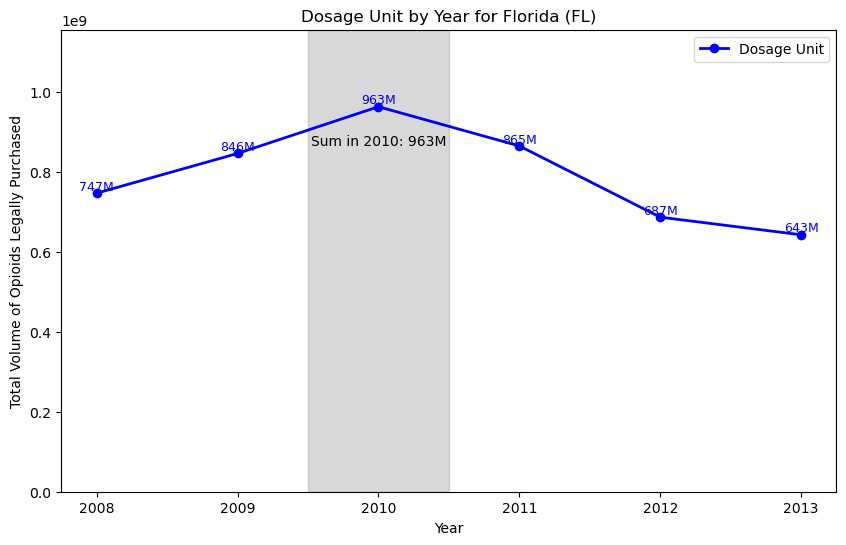

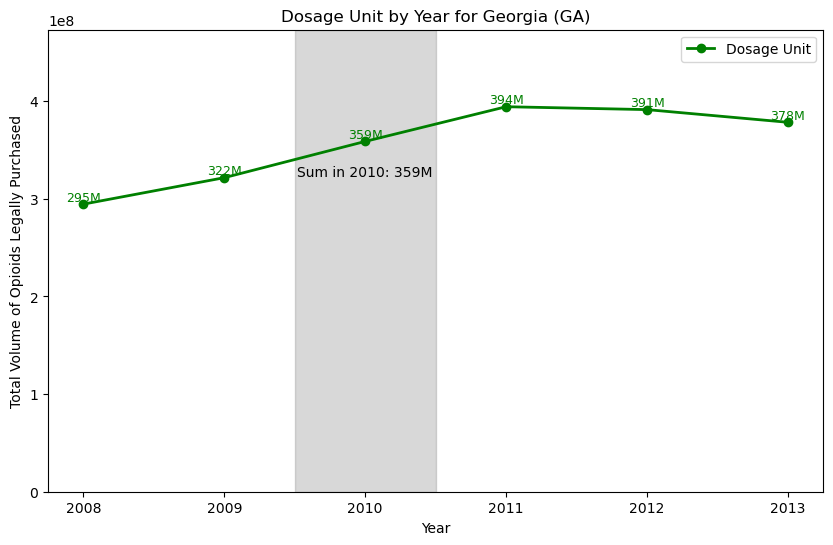

In [28]:
data_fl_yearly = (
    data_fl_ga[data_fl_ga["BUYER_STATE"] == "FL"]
    .groupby("year", as_index=False)["DOSAGE_UNIT"]
    .sum()
)

data_ga_yearly = (
    data_fl_ga[data_fl_ga["BUYER_STATE"] == "GA"]
    .groupby("year", as_index=False)["DOSAGE_UNIT"]
    .sum()
)

sum_dosage_fl_2010 = data_fl_yearly[data_fl_yearly["year"] == 2010][
    "DOSAGE_UNIT"
].values[0]
sum_dosage_ga_2010 = data_ga_yearly[data_ga_yearly["year"] == 2010][
    "DOSAGE_UNIT"
].values[0]

plt.figure(figsize=(10, 6))
plt.plot(
    data_fl_yearly["year"],
    data_fl_yearly["DOSAGE_UNIT"],
    marker="o",
    color="b",
    linewidth=2,
    label="Dosage Unit",
)
plt.title("Dosage Unit by Year for Florida (FL)")
plt.xlabel("Year")
plt.ylabel("Total Volume of Opioids Legally Purchased")

for i, row in data_fl_yearly.iterrows():
    plt.text(
        row["year"],
        row["DOSAGE_UNIT"],
        f"{row['DOSAGE_UNIT'] / 1_000_000:.0f}M",
        ha="center",
        va="bottom",
        fontsize=9,
        color="blue",
    )

plt.axvspan(2010 - 0.5, 2010 + 0.5, color="gray", alpha=0.3)
plt.text(
    2010,
    sum_dosage_fl_2010 * 0.9,
    f"Sum in 2010: {sum_dosage_fl_2010 / 1_000_000:.0f}M",
    ha="center",
    color="black",
    fontsize=10,
)

plt.ylim(0, data_fl_yearly["DOSAGE_UNIT"].max() * 1.2)
plt.xticks(
    range(int(data_fl_yearly["year"].min()), int(data_fl_yearly["year"].max()) + 1)
)

plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(
    data_ga_yearly["year"],
    data_ga_yearly["DOSAGE_UNIT"],
    marker="o",
    color="g",
    linewidth=2,
    label="Dosage Unit",
)
plt.title("Dosage Unit by Year for Georgia (GA)")
plt.xlabel("Year")
plt.ylabel("Total Volume of Opioids Legally Purchased")

for i, row in data_ga_yearly.iterrows():
    plt.text(
        row["year"],
        row["DOSAGE_UNIT"],
        f"{row['DOSAGE_UNIT'] / 1_000_000:.0f}M",
        ha="center",
        va="bottom",
        fontsize=9,
        color="green",
    )

plt.axvspan(2010 - 0.5, 2010 + 0.5, color="gray", alpha=0.3)
plt.text(
    2010,
    sum_dosage_ga_2010 * 0.9,
    f"Sum in 2010: {sum_dosage_ga_2010 / 1_000_000:.0f}M",
    ha="center",
    color="black",
    fontsize=10,
)

plt.ylim(0, data_ga_yearly["DOSAGE_UNIT"].max() * 1.2)
plt.xticks(
    range(int(data_ga_yearly["year"].min()), int(data_ga_yearly["year"].max()) + 1)
)

plt.legend()
plt.show()